In [1]:
###Project Orwell Main file
##Synopsis
#Script containing the core mechanics for the project, including the representation of people, objects and structures as distinct classes which use data structures and methods to simulate elements of life. With location and velocity being updated by physical accelerations provided by the environment, and things like emotions and ideologies being updated by mental accelerations provided by the environment.
##
##Imports
import numpy as np
import vpython as vp
import matplotlib.pyplot as plt
import random
##
def norm(vector):
    return vector/np.linalg.norm(vector)
##defining the classes and their methods
#beginning with objects, which are the general class, with only physical accelerations, and the other classes can be subclasses of objects
class Entity:
    def __init__(self,name,z,y,x,velz,vely,velx,forces):#grav, inter, pos and vel are lists. pos and vel are 3vectors, args are expected to be a set of tuples of the gravitas' and interaction strength's of the object on the set of potentials paired with a dictionary of the potentials names.
        self.x = x#calling the x,y,z components of the entity's position will return the integer values of the co-ordinates of the object on the raster map
        self.y = y
        self.z = z
        self.name = name
        self.vel = np.array([velz,vely,velx],dtype='float64')
        self.pos = np.array([z,y,x],dtype='float64')
        self.rpos=self.pos.astype(int)
        self.forces = forces
        self.trajectory = self.pos# want to create a 2 dimensional array, with the vector of the position as one dimension and then the time of occurance as another.

    
    def update(self,pot,timestep):
        '''looks to find the potential at the six points on the field adjacent to the objects position'''
        try:#to find the direction vector of the force experienced by the object. Uses a set of tuples as the field indexes and wraps them according to the shape of the field
            r_=np.array([pot.field[tuple((self.rpos)%pot.field.shape[0])]-pot.field[tuple((self.rpos)%pot.field.shape[0])],
          pot.field[tuple((self.rpos+(0,1,0))%pot.field.shape[1])]-pot.field[tuple((self.rpos+(0,-1,0))%pot.field.shape[1])],
          pot.field[tuple((self.rpos+(0,0,1))%pot.field.shape[2])]-pot.field[tuple((self.rpos+(0,0,-1))%pot.field.shape[2])]])
        except IndexError:
            r_=np.zeros(3)
            print('indexerror')
        acc=self.forces[pot.name][1]*-1*r_
        self.pos += timestep * self.vel
        self.pos %= 40
        self.rpos=self.pos.astype(int)
        self.vel *=0.97
        self.vel += timestep * acc
        self.z,self.y,self.x = self.rpos[0],self.rpos[1],self.rpos[2]
        self.trajectory = np.vstack([self.trajectory, self.pos])# want to make the trajectory be appended by the most recen position after each update, therefore creating acomplete record of the positoon of the pbject at each timestep. 
    def direct(self,objective,deter):
        self.objective = objective
        self.deter = deter
        
class Structure(Entity):
    def __init__(self):# the subcalss initialisation is broken, replace
        super(Structure, self).__init__()
    def update(self,pot,timestep):
        pass
class Potential:#this defines the class of potentials, this was used to both conform with the general style of oop for the rest of the project and so that the unique evaluation method can be defined
    def __init__(self,name,dimz,dimy,dimx,width):#defines the potential's name, initial dimensions, and the width parameter describing its range.
        self.name = name
        self.field = np.zeros((dimz,dimy,dimx))
        self.width = width
    def rangetest(self,entity,sensitivity):
        gravitas = np.abs(entity.forces[self.name][0])
        if gravitas != 0: #cannot permit zero in the cases where a field has no range, and cannot be less than zero as it would be if it wouldnt be detected at the specified level at any range.
            maxrangesquared = 2*(self.width**2)*(np.log(gravitas)-np.log(sensitivity))
        else:
            maxrangesquared = 0.0
        if maxrangesquared > 0:
            maxrange= np.sqrt(maxrangesquared)
        else:
            maxrange = 0
        return maxrange
    def update(self,i,ran):#i is an list of object, which is generating a field of that potential type
        self.field = np.zeros(np.shape(self.field))
        for j in i:
            r_raw=self.rangetest(j,ran)#gets the raw, floating value of the range limitation from the rangetest method
            r = int(round(r_raw))#rounds the value to the nearest integer and uses that as the criteria to create the cube of acceptable values
            for z in range(0,1):
                for y in range(j.y - r,j.y + r+1):#remember to include the z range variance once working with 3d variables
                    for x in range(j.x - r,j.x + r+1):
                        rp_mag = np.linalg.norm(np.array([x-j.x,y-j.y,z-j.z]))#fins the magnitude of the difference vector between the raised co-ordinates and the co-ordinates of the entity in question
                        if rp_mag<r_raw:#implements the further limits on the cube of acceptable values to create the sphere of acceptable values
                            try:
                                self.field[z,y,x] -= j.forces[self.name][0]*np.exp(-1*pow(rp_mag,2)/(2*pow(self.width,2)))#calls up the value at those co-ords and updates it withthe new calculation
                            except IndexError:
                                continue
                        else:
                            continue
##


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
##Defining the Potential spaces for the accelerations

pots=[Potential('Grav',1,40,40,4),Potential('Radpres',1,40,40,3)]#formatting of z,y,x
objs = [Entity('test1',0,15,17,0,0.4,0.05,{'Grav':(0.5,0),'Radpres':(-1,0)}),
        Entity('test2',0,16,17,0,0.3,0.025,{'Grav':(0.5,0),'Radpres':(-1,0)}),
        Entity('test3',0,15,16,0,0.2,0.1,{'Grav':(0.5,0),'Radpres':(-1,0)}),
        Entity('test4',0,16,16,0,0.1,0,{'Grav':(0.5,0),'Radpres':(-1,0)})]
'''Simulating entities with outward pressure'''
for j in range(0):
    objs.append(Entity('Mount{}'.format(j),
                       0,random.randint(0,40),random.randint(0,40),
                       0,0,0,
                       {'Grav':(0,0),'Radpres':(-random.random(),0)}))
'''Simulating entities gravitating towards one another'''    
for i in range(0):
    objs.append(Entity('Person{}'.format(i),
                       0,random.randint(0,40),random.randint(0,40),
                       0,random.random()-1,random.random()-1,
                       {'Grav':(random.random(),random.random()),'Radpres':(0,0.1)}))
			


##
##Running the sim
steps=2000
for t in range(steps):
    for p in pots:
        p.update(objs,0.01)
        for i in objs:
            i.update(p,0.1)
##



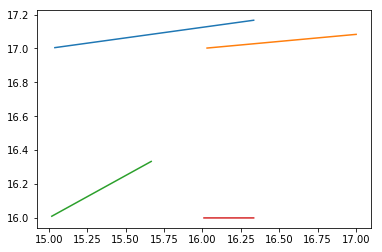

In [4]:
'''Trajectory plotting on static map'''
for i in range(len(objs)):
    test = objs[i].trajectory.T
    plt.plot(test[1],test[2])
plt.show()

In [11]:
'''Trajectory plotting with visualisation'''
scene = vp.canvas(center= vp.vector(15,15,0),scale=15)
balls = []
for o in objs:
    balls.append(vp.sphere(pos=vp.vector(o.trajectory[0][2],o.trajectory[0][1],o.trajectory[0][0]),
                           radius=0.1,
                           make_trail=True,
                           retain=50,
                           interval=10,
                           trail_type="points"))


for t in range(steps):
    for o,b in zip(objs,balls):
        b.pos=vp.vector(o.trajectory[t][2],
                        o.trajectory[t][1],
                        o.trajectory[t][0])
    vp.rate(50)

<IPython.core.display.Javascript object>

In [5]:
#objs[1].direct(np.array([0,15,15]),2)


In [6]:
'''        self.objective = np.array([0,0,0])
        self.deter = 02

        
        if self.deter !=0:
            self.vel = (self.objective-self.pos)*self.deter#This causes a velocity towards the objective with a direction which varies with the position but a constant velocity determined by the determination
            self.deter *=0.9
        else:
            pass
'''

ERROR! Session/line number was not unique in database. History logging moved to new session 192


'        self.objective = np.array([0,0,0])\n        self.deter = 02\n\n        \n        if self.deter !=0:\n            self.vel = (self.objective-self.pos)*self.deter#This causes a velocity towards the objective with a direction which varies with the position but a constant velocity determined by the determination\n            self.deter *=0.9\n        else:\n            pass\n'

In [7]:
'''
Theorise that a redesign using a system of updateing only the areas of the potential which will be affected noticably, and have the update type be applying a calculated difference.
'''

'''
suggested effciency move to not run the update code where the change would be minimal. calculate the range at which the gaussian topography becaomes effectively zero and just ignore those co-ordinates when updating. 
the magnitude of the change depends on the magnitude of the vecotr of differences in position. a constraint on that vector defines a sphere of non-sero affectation. 

the radius wil be defined by the object's gravitas and the range of the force. in the form of gravitas x exponential of 1/ twice the square of the range. this will be a positive value, which will be exponentially damped by the negative exponent of the magnitude of the difference in position. there will be a criteria where a given radius is sufficient to damp the function almost entirely to zero.

calculated for this test as the force power of 1/2 which comes from both the range and the gravitas parameters being defined as 1 for the test. it is then 1/2 * exp(-r**2) where r is the variable describing the magnitude of the positional difference. for a threshold of 1x10^-4 the inequality is then when fp*exp(-r**2) < 1x10^-4 which will be calculate by had to prduce a formula for a general force power

'''

"\nsuggested effciency move to not run the update code where the change would be minimal. calculate the range at which the gaussian topography becaomes effectively zero and just ignore those co-ordinates when updating. \nthe magnitude of the change depends on the magnitude of the vecotr of differences in position. a constraint on that vector defines a sphere of non-sero affectation. \n\nthe radius wil be defined by the object's gravitas and the range of the force. in the form of gravitas x exponential of 1/ twice the square of the range. this will be a positive value, which will be exponentially damped by the negative exponent of the magnitude of the difference in position. there will be a criteria where a given radius is sufficient to damp the function almost entirely to zero.\n\ncalculated for this test as the force power of 1/2 which comes from both the range and the gravitas parameters being defined as 1 for the test. it is then 1/2 * exp(-r**2) where r is the variable describing t

In [8]:
'''
for i in range(len(objs)):
    np.savetxt('C:\\Users\\theos\\Dropbox\\Documents\\PythonLibrary\\ProjectOrwell\\trajectory{}.csv'.format(i),objs[i].trajectory,delimiter=',',newline='\n')
'''

"\nfor i in range(len(objs)):\n    np.savetxt('C:\\Users\\theos\\Dropbox\\Documents\\PythonLibrary\\ProjectOrwell\\trajectory{}.csv'.format(i),objs[i].trajectory,delimiter=',',newline='\n')\n"

In [9]:
'''implement looping for the potential projection so that when looped the objects can still feel theforces on the other wside of the loop'''


'implement looping for the potential projection so that when looped the objects can still feel theforces on the other wside of the loop'

In [10]:
'''Sensitivity scale test
plt.plot(np.log(np.linspace(0.001,10,100))-np.log(1e-4),label='e-4 sensitivity')
plt.plot(np.log(np.linspace(0.001,10,100))-np.log(1e-5),label='e-5 sensitivity')
plt.plot(np.log(np.linspace(0.001,10,100))-np.log(1e-6),label='e-5 sensitivity')
plt.xlabel('Force Power')
plt.ylabel('Radius squared where change is non-zero')
plt.legend()
plt.show()
'''

"Sensitivity scale test\nplt.plot(np.log(np.linspace(0.001,10,100))-np.log(1e-4),label='e-4 sensitivity')\nplt.plot(np.log(np.linspace(0.001,10,100))-np.log(1e-5),label='e-5 sensitivity')\nplt.plot(np.log(np.linspace(0.001,10,100))-np.log(1e-6),label='e-5 sensitivity')\nplt.xlabel('Force Power')\nplt.ylabel('Radius squared where change is non-zero')\nplt.legend()\nplt.show()\n"